In [196]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models
import csv

In [197]:
def calibration_factor():
    weight = 1.19/1000 # kg
    F_measured = 2460/1000 #Newton 
    F_applied = weight * 9.81
    cb_factor = F_applied / F_measured
    print(cb_factor)
calibration_factor()

0.004745487804878048


In [216]:


def Fcr(d, L, E, K=1):
    """Euler critical load for a circular rod"""
    I = np.pi * d**4 / 64
    return np.pi**2 * E * I / (K * L)**2

def Fcr_error(d, L, E, delta_d, delta_L, delta_E, K=1, delta_K=0):
    """Error propagation for Euler load"""
    I = np.pi * d**4 / 64
    F = np.pi**2 * E * I / (K * L)**2

    # klopt nog niet helemaal!
    dF_dd = np.pi**3 * E * d**3 / (16 * (K*L)**2)
    dF_dL = -2 * F / L
    dF_dE = F / E
    dF_dK = -2 * F / K

    # total error
    delta_F = np.sqrt( (dF_dd*delta_d)**2 + (dF_dL*delta_L)**2 +
                       (dF_dE*delta_E)**2 + (dF_dK*delta_K)**2 )
    return delta_F

# Example parameters
d = 0.00185      # 2 mm
L = 0.0975      # 3 cm
E = 1.16e9        # 4 GPa
K = 1
delta_d = 0.0001   # 0.1 mm uncertainty
delta_L = 0.005    # 1 mm uncertainty
delta_E = 0.7e9    # 0.5 GPa uncertainty

# Example: Square column, factor 4
factor =  np.cos(np.radians(25.66))

F = factor * Fcr(d,L,E,K)
deltaF = factor * Fcr_error(d,L,E,delta_d,delta_L,delta_E,K,0)

print(f"F_max = {F:.2f} N ± {deltaF:.2f} N")


F_max = 0.62 N ± 0.41 N


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 127
    # variables        = 2
    chi-square         = 25669690.1
    reduced chi-square = 205357.521
    Akaike info crit   = 1555.51257
    Bayesian info crit = 1561.20094
    R-squared          = 0.31819502
[[Variables]]
    slope:      0.12555699 +/- 0.01643877 (13.09%) (init = 1)
    intercept: -0.97561854 +/- 0.23873849 (24.47%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.8629


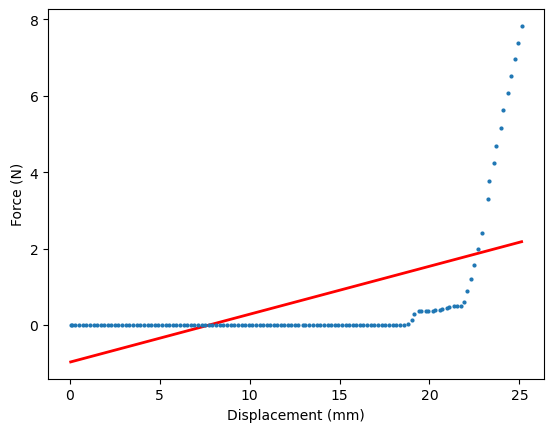

In [199]:

mod_linear = models.LinearModel()

force_list = []
displacement_list = []
time_list = []

with open("pyramide_meting_1.csv", "r") as file:
    my_reader = csv.reader(file, delimiter=",")
    next(my_reader)   

    for row in my_reader:
        time_list.append(row[0])
        displacement_list.append(float(row[1]))
        force_list.append(float(row[2]) / -1000)


y_err = np.array(len(force_list) * [0.003])
y_inv_err = 1 / y_err

fit_result = mod_linear.fit(force_list, x=displacement_list, weights=y_inv_err)

print(fit_result.fit_report())

plt.figure()
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")

plt.errorbar(displacement_list, force_list, yerr=0.003, fmt='o', markersize=2)
plt.plot(displacement_list, fit_result.best_fit, 'r-', linewidth=2)

plt.show()


This is the code for the tetrahede!!

0.6283152399
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 16
    # variables        = 2
    chi-square         = 302719.794
    reduced chi-square = 21622.8424
    Akaike info crit   = 161.567587
    Bayesian info crit = 163.112764
    R-squared          = 0.97420911
[[Variables]]
    slope:      2.71240107 +/- 0.11794972 (4.35%) (init = 1)
    intercept: -107.326513 +/- 4.85868544 (4.53%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9997


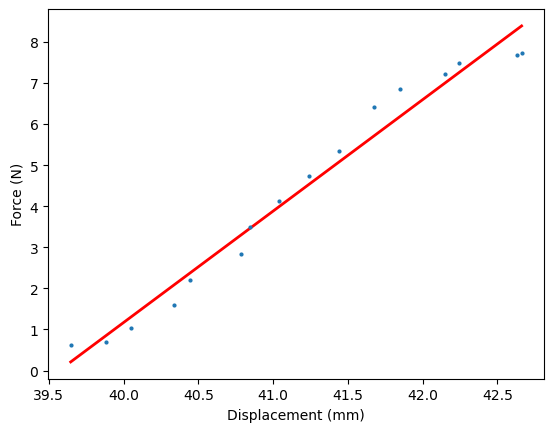

In [200]:


mod_linear = models.LinearModel()

force_list = []
displacement_list = []
time_list = []

with open("tetrahede_tweede_meting.csv", "r") as file:
    my_reader = csv.reader(file, delimiter=",")
    next(my_reader)
    for row in my_reader:
        time_list.append(row[0])
        displacement_list.append(float(row[1]))
        force_list.append(float(row[2])/-1000)

new_force = []
new_disp = []

i = 0
breek_drempel = 1   
was_prev = None
stoppen = False

while i < len(displacement_list) and stoppen == False:

    if displacement_list[i] > 39.5:
        if was_prev is None:
            was_prev = force_list[i]

        if force_list[i] < was_prev - breek_drempel:
            stoppen = True
        else:
            new_disp.append(displacement_list[i])
            new_force.append(force_list[i])
            was_prev = force_list[i]

    i += 1
print(new_force[0])
y_err = np.array(len(new_force) * [0.003])
y_inv_err = 1 / y_err

fit_result = mod_linear.fit(new_force, x=new_disp, weights=y_inv_err)

print(fit_result.fit_report())

plt.figure()
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.errorbar(new_disp, new_force, yerr=0.003, fmt='o', markersize=2)
plt.plot(new_disp, fit_result.best_fit, 'r-', linewidth=2)
plt.show()


Now for the Pyramid!

0.71991408353
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 26
    # variables        = 2
    chi-square         = 35.6267761
    reduced chi-square = 1.48444900
    Akaike info crit   = 12.1900248
    Bayesian info crit = 14.7062179
    R-squared          = 0.99397220
[[Variables]]
    slope:      3.16069942 +/- 0.05024235 (1.59%) (init = 1)
    intercept: -120.866613 +/- 1.97887824 (1.64%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9998


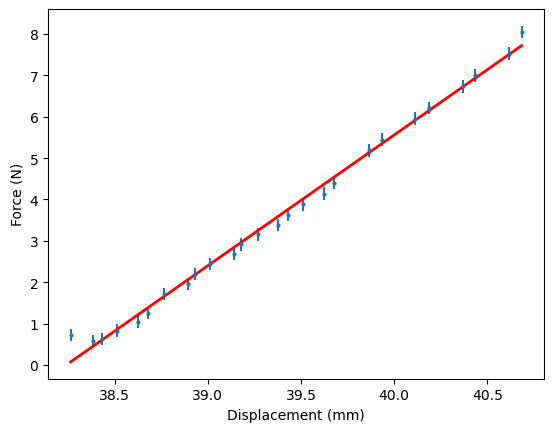

In [227]:


mod_linear = models.LinearModel()

force_list = []
displacement_list = []
time_list = []

with open("meting_kubus_drie.csv", "r") as file:
    my_reader = csv.reader(file, delimiter=",")
    next(my_reader)
    for row in my_reader:
        time_list.append(row[0])
        displacement_list.append(float(row[1]))
        force_list.append(float(row[2])/-1000)

new_force = []
new_disp = []

breek_drempel = 0.6
was_prev = None

for disp, force in zip(displacement_list, force_list):

    if disp > 38.2:
        if was_prev is None:
            was_prev = force
        
        if force < was_prev - breek_drempel:
            break  
        else:
            new_disp.append(disp)
            new_force.append(force)
            was_prev = force

y_err = np.array([0.15] * len(new_force))  # fout per punt
y_inv_err = 1 / y_err                       # gewicht voor lmfit
fit_result = mod_linear.fit(new_force, x=new_disp, weights=y_inv_err)
print(new_force[0])
print(fit_result.fit_report())

plt.figure()
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.errorbar(new_disp, new_force, yerr=y_err, fmt='o', markersize=2)
plt.plot(new_disp, fit_result.best_fit, 'r-', linewidth=2)
plt.show()


0.49953915192
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 2350347.63
    reduced chi-square = 130574.868
    Akaike info crit   = 237.486831
    Bayesian info crit = 239.478295
    R-squared          = 0.98129824
[[Variables]]
    slope:      2.13622117 +/- 0.06951054 (3.25%) (init = 1)
    intercept: -46.0477185 +/- 1.61698746 (3.51%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9988


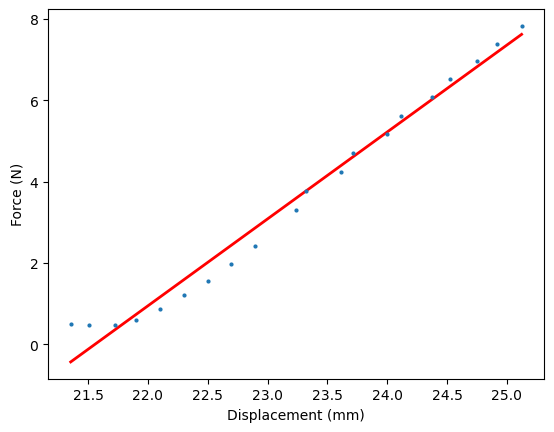

In [237]:


mod_linear = models.LinearModel()

force_list = []
displacement_list = []
time_list = []

with open("pyramide_meting_1.csv", "r") as file:
    my_reader = csv.reader(file, delimiter=",")
    next(my_reader)
    for row in my_reader:
        time_list.append(row[0])
        displacement_list.append(float(row[1]))
        force_list.append(float(row[2])/-1000)

new_force = []
new_disp = []

breek_drempel = 10
was_prev = None

for disp, force in zip(displacement_list, force_list):

    if disp > 21.3:
        if was_prev is None:
            was_prev = force
        
        if force < was_prev - breek_drempel:
            break  
        else:
            new_disp.append(disp)
            new_force.append(force)
            was_prev = force
    

y_err = np.array([0.001] * len(new_force))  # fout per punt
y_inv_err = 1 / y_err                       # gewicht voor lmfit
fit_result = mod_linear.fit(new_force, x=new_disp, weights=y_inv_err)
print(new_force[0])
print(fit_result.fit_report())

plt.figure()
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.errorbar(new_disp, new_force, yerr=y_err, fmt='o', markersize=2)
plt.plot(new_disp, fit_result.best_fit, 'r-', linewidth=2)
plt.show()


0.61302686001
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 45
    # variables        = 2
    chi-square         = 4580227.91
    reduced chi-square = 106516.928
    Akaike info crit   = 522.876857
    Bayesian info crit = 526.490182
    R-squared          = 0.98272154
[[Variables]]
    slope:      1.97608142 +/- 0.03995838 (2.02%) (init = 1)
    intercept: -56.3364077 +/- 1.21506918 (2.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9992


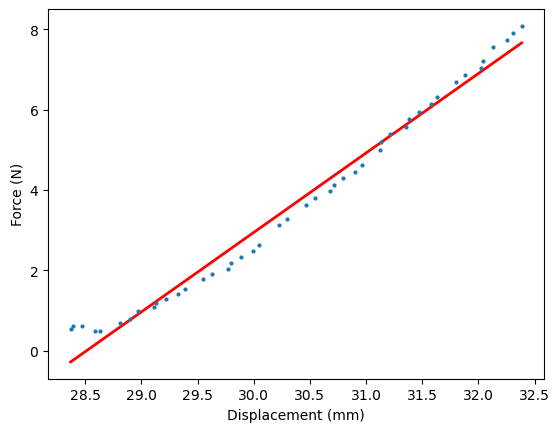

In [213]:
"""Dit is de code voor de octahedron
"""

mod_linear = models.LinearModel()

force_list = []
displacement_list = []
time_list = []

with open("octahedron_meting_1.csv", "r") as file:
    my_reader = csv.reader(file, delimiter=",")
    next(my_reader)
    for row in my_reader:
        time_list.append(row[0])
        displacement_list.append(float(row[1]))
        force_list.append(float(row[2])/-1000)

new_force = []
new_disp = []

breek_drempel = 10
was_prev = None

for disp, force in zip(displacement_list, force_list):

    if disp > 28.3:
        if was_prev is None:
            was_prev = force
        
        if force < was_prev - breek_drempel:
            break  
        else:
            new_disp.append(disp)
            new_force.append(force)
            was_prev = force
    

y_err = np.array([0.001] * len(new_force))  # fout per punt
y_inv_err = 1 / y_err                       # gewicht voor lmfit
fit_result = mod_linear.fit(new_force, x=new_disp, weights=y_inv_err)
print(new_force[1])
print(fit_result.fit_report())

plt.figure()
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.errorbar(new_disp, new_force, yerr=y_err, fmt='o', markersize=2)
plt.plot(new_disp, fit_result.best_fit, 'r-', linewidth=2)
plt.show()


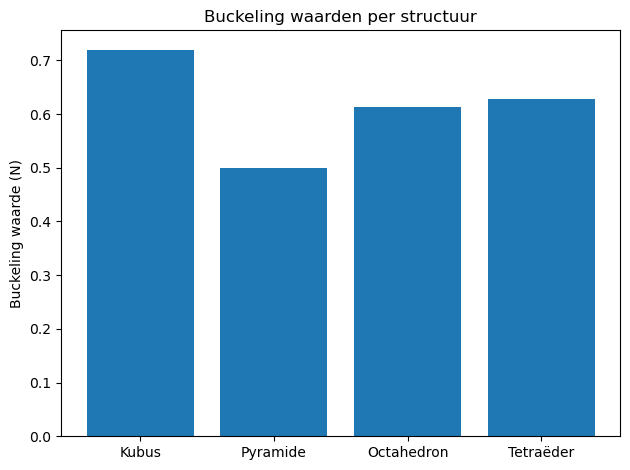

In [238]:
import matplotlib.pyplot as plt

names = ["Kubus", "Pyramide", "Octahedron", "Tetraëder"]
values = [0.71991408353, 0.49953915192, 0.61302686001, 0.6283152399]

plt.figure()
plt.bar(names, values)
plt.ylabel("Buckeling waarde (N)")
plt.title("Buckeling waarden per structuur")
plt.tight_layout()
plt.show()
